# Lab 2 Travelling salesman problem (TSP)

__Simulated annealing (SA)__ is a probabilistic technique for approximating the global optimum of a given function. 

The idea behind the method is that in the metaphor with statistical mechanics, the sum of the distances between all the cities is the energy of the system, which we wish to minimize. We consider the Gibbs factor: 

\begin{equation*}
\mathrm{e}^{-\Delta E / T}
\end{equation*}

of the exponential of the (negative) change in energy over temperature which should be something like the probability of transitioning to the new state from the old one. 

If this factor has
\begin{equation*} 
\mathrm{e}^{-\Delta E / T}>1
\end{equation*}
then the new energy is lower, and we should definitely take the new tour. Otherwise, even if it’s worse, we want to take the new tour with some probability so that we don’t get stuck in a local minimum.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob 
import math
import copy
import os

In [2]:
### read cities coordinates from http://www.math.uwaterloo.ca/tsp/vlsi/index.html#XQF131

def read_cities_coord(filepath):
    with open(filepath, "r") as f:
        file = f.read().splitlines()
    cities = []
    for coords in file:
        city = coords.split(' ')
        cities.append([int(city[1]), int(city[2])])
    return cities

In [3]:
### calculate Euclidean distance for the tour 

def calculate_dist(cities, tour, i, j):
    n_cities = len(cities)
    dist = sum([ math.sqrt(sum([(cities[tour[(k+1) % n_cities]][d] - cities[tour[k % n_cities]][d])**2 for d in [0,1] ])) for k in range(n_cities)]) 
    return dist

In [4]:
#visuilize results 

def present_results(cities, tour, dist_list):
    n_cities = len(cities)
    
    plt.plot([cities[tour[i % n_cities]][0] for i in range(n_cities+1)], [cities[tour[i % n_cities]][1] for i in range(n_cities+1)], 'o-')
    plt.title('Optimal path')
    plt.xlabel('x-coord')
    plt.ylabel('y_coord')
    plt.show()
    
    plt.plot(dist_list)
    plt.xlabel('Iterations')
    plt.ylabel('Dist')
    plt.title('Distance')
    plt.show()
    
    res = pd.DataFrame([cities[x] for x in tour])
    res['N'] = tour
    res = res.rename(columns = {0 : 'x-coord', 1 : 'y-coord'}).set_index('N')
    
    return res

The min distance: 7079.0
The benchmark distance (pma343 instance): 1368


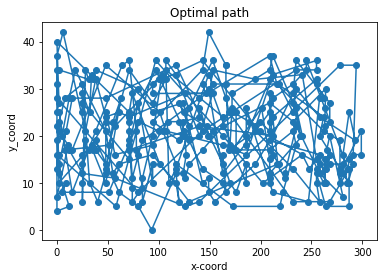

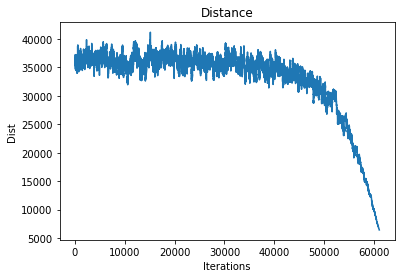

----------------
The min distance: 1226.0
The benchmark distance (xqf131 instance): 564


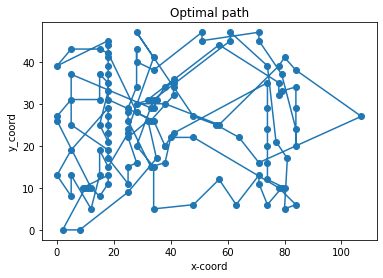

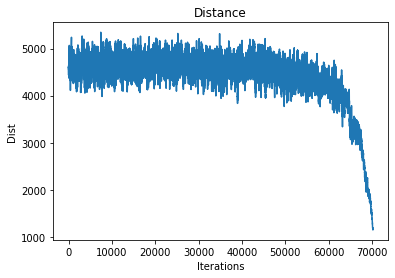

----------------
The min distance: 2992.0
The benchmark distance (xqg237 instance): 1019


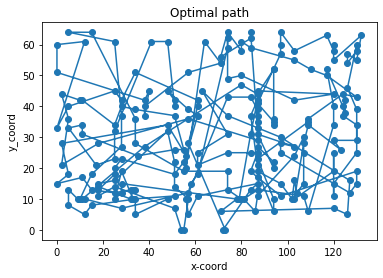

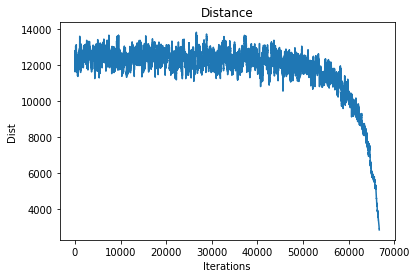

----------------


In [9]:
n_inter = 100000

benchmark_dist = {
    'pma343' : 1368,
    'xqf131' : 564, 
    'xqg237' : 1019
}

for file in glob.glob('../Lab2_TSP/data/' + '*.txt'):
    name = file.split('\\')[-1].replace('.txt', '')
    cities = read_cities_coord(file)
    n_cities = len(cities)
    tour = random.sample(range(n_cities),n_cities); # define initial tour
    dist = []

    for temperature in np.logspace(0,5,num=n_inter)[::-1]: # exponentially distributed temperatures

        [i,j] = sorted(random.sample(range(n_cities),2)); # randomly select two cities 

        new_tour = tour.copy()
        new_tour[i], new_tour[j] = new_tour[j], new_tour[i] # swap two cities

        old_dist = calculate_dist(cities=cities, tour=tour, i=i, j=j) # calculate dist for old tour
        new_dist = calculate_dist(cities=cities, tour=new_tour, i=i, j=j) # calculate dist for new tour

        if math.exp((old_dist - new_dist) / temperature) > random.random(): 
            tour = copy.copy(new_tour);
            dist.append(new_dist)

    min_dist = sum([ math.sqrt(sum([(cities[tour[(k+1) % n_cities]][d] - cities[tour[k % n_cities]][d])**2 for d in [0,1] ])) for k in range(n_cities)]) 
    
    print('The min distance: {}'.format(np.round(new_dist)))
    print('The benchmark distance ({} instance): {}'.format(name, benchmark_dist[name]))
    res_df = present_results(cities=cities, tour=tour, dist_list=dist)
    print('----------------')
